# Homework 2

**DUE NOV 11th at 11:59 PM**

You are expected to turn in a **pdf version** of this notebook with all your **codes, results, and figures** (Use the print option). Make sure the figures and results are visible as you want them to appear in the pdf before turning it in. Please do not modify the instructions as doing so will limit our ability to follow and grade your answers.

## Problem 1 (HW1 Problem 4)

In this problem, you will work on the clustering problem using Bottom-up Agglomerative clustering and K-mean clustering.

a) A 4-D dataset is given in **'iris.csv'** with the last column being the ground truth label. Load the file. Store the data in a variable ***X*** and store the label in a variable ***y***. Because clustering is an unsupervised task, there is no need for the labels during training.

In [231]:
import numpy as np  
import pandas as pd

data = pd.read_csv("iris.csv", header=None)   
X= data.iloc[:, [0,1,2,3]].values
Y = data[4].to_numpy() 

b) Train a clustering model using Bottom-up Agglomerative clustering.

In [232]:
from sklearn.cluster import AgglomerativeClustering    

model = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='ward')  
model.fit(X)
labels = model.labels_  


Visualize your clusters on a 2-D plot. Choose any 2 dimensions from the 4 dimensions to plot. Try to pick the 2 dimensions that best separate the data. Your plot should contains all the data points with points from the same predicted cluster haveing the same color. 

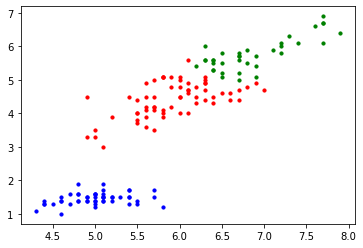

In [233]:
from matplotlib import pyplot as plt
plt.scatter(X[labels==0, 0], X[labels==0, 2], s=10, marker='o', color='red')
plt.scatter(X[labels==1, 0], X[labels==1, 2], s=10, marker='o', color='blue')
plt.scatter(X[labels==2, 0], X[labels==2, 2], s=10, marker='o', color='green')  

plt.show()

Repeat the visualization step above using the same 2 dimensions. This time, plot according to the ground truth classes. Comment on the performance of your model.

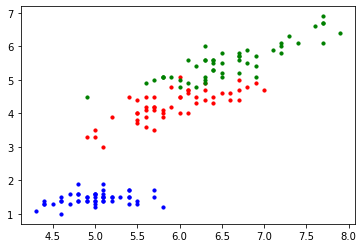

In [234]:
    
for x in range(150): 
    if Y[x] == 'Setosa':  
        myplant = 'blue' 
    elif Y[x] == 'Versicolor': 
        myplant= 'red'  
    else: 
        myplant= 'green' 
    
    plt.scatter(X[x][0], X[x][2], s=10, marker='o', color=myplant) 

The model created from AgglomerativeClustering() appears to be better than using the ground truth classes. Comparing the two 2-D graphs, the ground truth class graph appears to have overlap of the green and red clusters while the graph from the predicted model appears to not have any overlap, therefore being better in preformance.

c) Train a clustering model using K-mean clustering.

In [237]:
from sklearn.cluster import KMeans   
kmodel = KMeans(n_clusters=3, random_state=0).fit(X)
klabels = kmodel.labels_    

Visualize your clusters on a 2-D plot. Choose any 2 dimensions from the 4 dimensions to plot. Try to pick the 2 dimensions that best separate the data. Your plot should contains all the data points with points from the same predicted cluster haveing the same color.

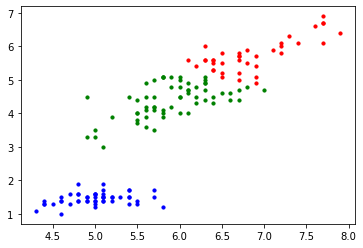

In [207]:
plt.scatter(X[klabels==0, 0], X[klabels==0, 2], s=10, marker='o', color='red')
plt.scatter(X[klabels==1, 0], X[klabels==1, 2], s=10, marker='o', color='blue')
plt.scatter(X[klabels==2, 0], X[klabels==2, 2], s=10, marker='o', color='green')  

plt.show()

Repeat the visualization step above using the same 2 dimensions. This time, plot according to the ground truth classes. Comment on the performance of your model.

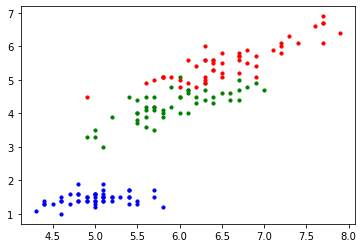

In [238]:
for x in range(150): 
    if Y[x] == 'Setosa':  
        myplant = 'blue' 
    elif Y[x] == 'Versicolor': 
        myplant= 'green'  
    else: 
        myplant= 'red' 
    
    plt.scatter(X[x][0], X[x][2], s=10, marker='o', color=myplant) 
    

Kmeans is the better model, as the clusters within that model are closely compacted in each cluster with minimal overlap. In the model using the groudn truth classes above, there is aoverlap of the red and green clusters.

d) Perform Principle Component Analysis (PCA) on the data. Project the original data on the 2 largest principle components. Store this new projected 2-D data in a variable ***X_projected***.

In [223]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)

X_projected = pca.fit_transform(X)

#X_projected = data.iloc[:, [0,2]].values  

Repeat part **b** on the new 2-D data. Train the Bottom-up Agglomerative model and visualize your results.

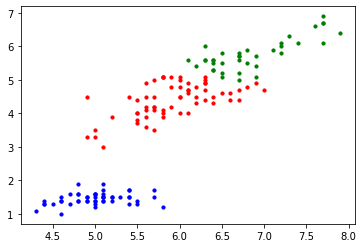

In [224]:
xmodel = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='ward').fit(X_projected)
xlabels = xmodel.labels_        
plt.scatter(X[xlabels==0, 0], X[xlabels==0, 2], s=10, marker='o', color='red')
plt.scatter(X[xlabels==1, 0], X[xlabels==1, 2], s=10, marker='o', color='blue')
plt.scatter(X[xlabels==2, 0], X[xlabels==2, 2], s=10, marker='o', color='green')  

plt.show()

Repeat part **c** on the new 2-D data. Train the K-means model and visualize your result.

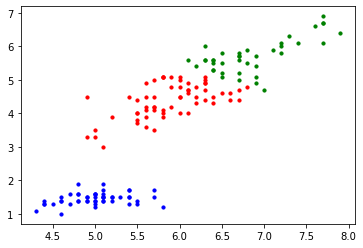

In [230]:
xkmodel = KMeans(n_clusters=3, random_state=0).fit(X_projected)
xklabels = xkmodel.labels_    
plt.scatter(X[xklabels==0, 0], X[xklabels==0, 2], s=10, marker='o', color='blue')
plt.scatter(X[xklabels==1, 0], X[xklabels==1, 2], s=10, marker='o', color='red')
plt.scatter(X[xklabels==2, 0], X[xklabels==2, 2], s=10, marker='o', color='green')  
plt.show()

Compare the quality of 4-D and 2-D clusterings. When would the ideas of projection and dimensionality reduction be useful?

4-D clusterings and higher can make learning algorithms too slow due to high dimensions and is hard to interpret and visialize. 2-D clustering, although produces many more combinations of dimesnions is faster and also easier to interpret and visualize. Having too high dimensions means adding more predictors and influence in the model eventually causes deffincieny and inaccuracy of the model. This is known as the "curse of dimensionality" and having more reduced dimensions and projected principle values percisely related yeilds better results and preformance.


## Problem 2

In this problem, you will first implement the Naive Bayes (NB) algorithm from scratch. We will use a dataset for classifying if a patient has breast cancer. Each instance (row) in the dataset is a patient described by the 9 following features (with their corresponding values).

1. Clump Thickness: 1 - 10
2. Uniformity of Cell Size: 1 - 10
3. Uniformity of Cell Shape: 1 - 10
4. Marginal Adhesion: 1 - 10
5. Single Epithelial Cell Size: 1 - 10
6. Bare Nuclei: 1 - 10
7. Bland Chromatin: 1 - 10
8. Normal Nucleoli: 1 - 10
9. Mitoses: 1 - 10

Given these features, we will classify a car into one of the 2 classes: 0 (benign) or 1 (malignant).

NB is a very simple algorithm. Consider a feature **X**. For each value **$x_i$** of **X** and each class label **$y_j$**, NB calculates the value of $P(X = x_i | Y = y_j)$. For example, take the feature **Mitoses**, NB will calculate all the following values:

- P(Mitoses = 1 | Class = 0), P(Mitoses = 2 | Class = 0), P(Mitoses = 3 | Class = 0), ... , P(Mitoses = 10 | Class = 0)
- P(Mitoses = 1 | Class = 1), P(Mitoses = 2 | Class = 1), P(Mitoses = 3 | Class = 1), ... , P(Mitoses = 10 | Class = 1)

Repeat this calculation for all the features. In the end, NB keep a recording of all possible $P(X | Y)$. The calculation itself is intuitive:

$$
 P(X = x_i | Y = y_j) = \frac{\text{Number of rows with } X = x_i \text{ and } Y = y_j}{\text{Number of rows with } Y = y_j}
$$

In addition, NB also calculate the priors probability $P(Y = y_j)$. Again, intuitively:

$$
 P(Y = y_i) = \frac{\text{Number of rows with } Y = y_j}{\text{Number of rows in the dataset}}
$$

Given a test example $X_{test} = \{ X_0 = x_0, X_1 = x_1, \ldots, X_i = x_i\}$, for each class label $y_j$, NB calculate:

$$
\begin{align}
 P(Y = y_j | X_{test}) & = P(X_{test} | Y = y_j)P(Y = y_j) \\
                       & = P(X_0 = x_0 | Y = y_j)P(X_1 = x_1 | Y = y_j) \ldots P(X_i = x_i | Y = y_j)P(Y = y_j)
\end{align}
$$

Such calculation is easy since we have bookkept all $P(X | Y)$ and all $P(Y)$ in previous steps. The output of the model is simply:

$$
 \underset{y_j}{\operatorname{argmax}} P(Y = y_j | X_{test})
$$

You will do each of these steps following this problem. We will use Pandas to deal with the data in this problem. Pandas can do queries like "Get all the rows in which Clump Thickness = 2 and Class = 1" with minimal syntax.


a) First let's load the dataset and store it in a Pandas dataframe. Play with the dataframe and get used to the queries (this part is not graded). This guide is a good place to start:

https://medium.com/python-in-plain-english/filtering-rows-and-columns-in-pandas-python-techniques-you-must-know-6cdfc32c614c 

Split the dataset into a training set and a testing set. Use 10% of the data as the testing set (The splitting is graded).

In [259]:
import pandas as pd    
import numpy as np
from sklearn.model_selection import train_test_split
cancer_dataset = pd.read_csv("breast-cancer-wisconsin.csv", header=None)   
cancer_dataset = cancer_dataset.drop(0)
train, test = train_test_split(cancer_dataset, test_size=0.1)    

b) Now we will build up the bookkeeping. Let's start with the priors $P(Y = y_j)$, $y_j \in$ {0,1}. For each of these labels, calculate $P(Y = y_j)$ by simply counting the number of times $y_j$ appears in the dataset divided by the size of the dataset. You can bookkeep the priors in a dictionary with keys being $y_j$.

In [260]:
py = {0:0,1:0}    
for patient in train[9]: 
    if patient == '0': 
        py[0] += 1 
    else: 
        py[1] += 1     
probpos = py[1] / len(train)
probneg = py[0] / len(train)


Now let's calculate the conditional probability $P(X = x_i | Y = y_j)$. If you do the query with Pandas, this counting should be simple. This time, store the conditional probability in another dictionary with keys ($x_i$, $y_j$) or any data structure that you prefer. 

In [261]:
pddict = {}  

for x in range(9):  
    pddict[x] = train.groupby(x)[9].value_counts() / len(train)    
    pddict[x] = pddict[x].to_dict()   
    for j in pddict[x].keys(): 
        if j[1] == '1':  
            pddict[x][j] = pddict[x][j]/ probpos 
        if j[1] == '0': 
            pddict[x][j] = pddict[x][j]/ probneg     

That's it! You have successfully "trained" a NB model. Let's test our model on the test dataset.

Implement a **predict** function that returns $\underset{y_j}{\operatorname{argmax}} P(Y = y_j | X_{test})$ (refer to the description above). 

In [263]:
def predict(X_test):  
    poslist = [] 
    neglist = []
    for i in range(9):    
        try:
            pos = pddict[i][(str(X_test[i]), '1')] 
        except: 
            pos = 0
        try:
            neg = pddict[i][(str(X_test[i]), '0')]    
        except: 
            neg = 0 
        
        poslist.append(pos) 
        neglist.append(neg)    
    compare= [np.prod(poslist),np.prod(neglist)] 
    if compare[0] > compare[1]: #if its bigger then its positive 
        return 1   
    elif compare[0] == compare[1]: #if they are equal (which is rare) we randomly assign it positive or negative
        return  random.randint(0, 1)
    else: # if its smaller than its negative
        return 0 

Predict the label of all the instances in the test dataset, calculate and print out the accuracy.

In [264]:
mytest = test.transpose().to_dict()  
good = 0 
bad = 0
for x in mytest.keys():  
    temp = mytest[x] 
    truth = str(temp[9]) 
    templist = []
    for y in range(9):    
        templist.append(temp[y]) 
    prediction = predict(templist) 
    if str(prediction) == truth: 
        good += 1 
    else: 
        bad += 1  
print('accuracy: ' + str(good/(good+bad)))   


accuracy: 0.9714285714285714


## Problem 3

In this problem, you will implement the Logistic Regression (LR) algorithm from scratch. Similar to NB, LR relies on $P(Y|X)$ to predict the class of an example. However, unlike NB, a generative model, LR is a discriminative model so it does not need to estimate $P(X|Y)$ and $P(Y)$. LR assumes the form of the conditional probability $P(Y|X)$ to be:

$$
    P(Y | X) = f(X) = \frac{1}{1 + e^{-(\alpha X + \beta)}}
$$

$f(X)$ returns a value in (0,1). The model classifies $X$ as $1$ if $f(X)$ is closer to $1$ and $0$ otherwise. We have to estimate the model parameters: the vector $\alpha$ and $\beta$ from the data, which we will do via stochastic gradient descent (SGD). In SGD, a training example is shown to the model each at a time. The model makes a prediction on the training example and the error between the prediction and the ground-truth label is used to update the model's parameters. We use the log-likelihood loss to estimate the error in this problem. In particular, the log-likelihood loss for classifying the $X^{(i)}$ example with the ground-truth $y^{(i)}$ is: 

$$
    LL(y^{(i)},f(X^{(i)})) = -(y^{(i)} \log(f(X^{(i)})) + (1 - y^{(i)}) \log(1 - f(X^{(i)})))
$$

In our case, the updating is as the followings:

$$
\alpha_{j}(t+1) = \alpha_{j}(t) - \frac{\partial LL}{\partial \alpha_j} \times rate
$$

$$
\beta(t+1) = \beta(t) - \frac{\partial LL}{\partial \beta} \times rate
$$

where $rate$ is the how much change we want to make to the parameters in each update. Whenever we finish looping through all the instances in the dataset to update the parameters, we finish a training epoch. We may do many training epochs (looping through the dataset many times), until the model parameters converge.

First, we need to derive the formula for $\frac{\partial LL}{\partial \alpha_j}$ and $\frac{\partial LL}{\partial \beta}$. To keep the problem simple, these are provided to you:

$$
    \frac{\partial LL}{\partial \alpha_j} = -(y^{(i)} - f(X^{(i)}))X^{(i)}_{j}
$$

$$
    \frac{\partial LL}{\partial \beta} = -(y^{(i)} - f(X^{(i)}))
$$

a) We use the same dataset for predicting breast cancer in Problem 2 for this problem. Load the dataset and split it into a training set and a testing set.

In [265]:
import pandas as pd  
from sklearn.model_selection import train_test_split
cancer_dataset2 = pd.read_csv("breast-cancer-wisconsin.csv", header=0) 
train, test = train_test_split(cancer_dataset2, test_size=0.1)    
train = train.transpose().to_dict()  
test = test.transpose().to_dict()

b) Learn the model parameters using SGD. A skeleton for SGD is provided to help you understand the process (You don't have to use the provided code). 

In [266]:
import numpy as np   
import random

def predict(row,a,B):  
    row = row[0:9]  
    power= -(sum(a*row)+B)
    fx=1/(1+np.exp(power))   
    fx = np.prod(fx)
    if fx >= 0.5: 
        return 1 
    else: 
        return 0  
    
def genalpha():  #create random initial alpha values
    randomval = []
    for i in range (9):
        temp = random.uniform(-0.5,0.5)
        randomval.append(temp)
    numpy_random = np.asarray(randomval)
    return numpy_random   

def genbeta(): #create random beta value
    return random.uniform(-1,1)

#gonna do one epoch  
def one_epoch(train, rowcount, alpha, beta, rate):
    for i in train.keys():  
        temp = list(train[i].values()) 
        alphachange = np.zeros(9)  
        for j in range(9):  
            alphachange[j] = -(temp[9] - predict(temp,alpha,beta))*temp[j] 
        betachange = -(temp[9] - predict(temp,alpha,beta))    
        
        #update alpha array and beta value 
        beta = beta - betachange*rate 
        for j in range(9): 
            alpha[j] = alpha[j] - alphachange[j]*rate        
    return (alpha, beta)

def multiple_epochs(train,rowcount,alpha,beta,rate,epochs): 
    for epoch in range(epochs): 
        alphbet = one_epoch(train, rowcount, alpha, beta, rate)   
        alpha = alphbet[0] 
        beta = alphbet[1]   
    print("alpha_values: "+ str(alpha))  
    print("beta_value: "+ str(beta))
    return (alpha,beta)  

alpha = genalpha() #initialize alpha values 
beta = genbeta() #initialize beta value 
rate = 0.01 
epochs = 15  
rowcount = len(train)
alphb = multiple_epochs(train, rowcount, alpha, beta, rate, epochs)  
alpha = alphb[0] 
beta = alphb[1]

alpha_values: [ 0.14341307  0.15314424  0.12328508  0.08510327 -0.04010798  0.15869389
 -0.03598319  0.04963308  0.14042538]
beta_value: -2.094880051943608


c) Load the testing dataset. Use $f(X)$ to predict the labels of the test instances. Calculate the accuracy.

In [267]:
good = 0 
bad = 0     
for i in test.keys():    
    temp = list(test[i].values())
    sample = predict(temp,alpha,beta) 
    if str(sample) == str(temp[9]): 
        good += 1 
    else: 
        bad +=1 
print('accuracy: '+str((good)/(good+bad)))

accuracy: 0.9857142857142858


## Problem 4

In this problem, you will investigate how the size of the training data on the performance of a generative model (NB) and a discriminative model (LR). **You are free to use scikit-learn's NB and LR.** 

a) Load the breast cancer training dataset and split it into a training set and a testing set. 

In [294]:
import pandas as pd  
from sklearn.model_selection import train_test_split  
cancer_dataset2 = pd.read_csv("breast-cancer-wisconsin.csv", header=0) 
train, test = train_test_split(cancer_dataset2, test_size=0.1)    
train = train.transpose().to_dict() 
test = test.transpose().to_dict()

b) We will train NB classifiers that use only a portion of the training data. Let's vary this portion from 1% to 100% of the training set (100 iterations). For each portion value, sample the training set according to the portion, train a NB classifer on this portion of the training set, and evaluate the model accuracy on the testing set.  

In [298]:
from sklearn.naive_bayes import MultinomialNB    
import random  
import matplotlib.pyplot as plt
percentage = 0.01  
testlength = len(test)  
accuracy = []  
def accuracy_check(model,truth,test):  
    good = 0
    bad = 0   
    testX = []
    testY = []      
    for k in list(test.keys()):    
        testX.append(list(test[k].values())[0:9]) 
        testY.append(list(test[k].values())[9])   
    testX = np.matrix(testX)  
    predictions = model.predict(testX)
    for k in range(len(testX)):   
        if str(predictions[k]) == str(testY[k]): 
            good += 1 
        else: 
            bad += 1   
    
    return (good/(good+bad))  
    
    
for i in range(100):     
    model = MultinomialNB()
    trainkeys = list(train.keys()) 
    datalength = len(trainkeys)    
    partitionX = []   
    labelY = []  
    amount = int(datalength*percentage)  
    #grab random indexes from trainkeys 
    for j in range(amount):  #amount is number of samples to grab in this current interation  
        temp = int(random.uniform(0,datalength-1))  #pick random index between 0 and datalength-1 
        partitionX.append(list(train[trainkeys[temp]].values())[0:9])   #append that data to partionX
        labelY.append(list(train[trainkeys[temp]].values())[9]) #append the value to labelY 
        trainkeys.pop(temp)  #remove that datapoint from the trainkeys array so we dont accidentally select it again 
        datalength = len(trainkeys)  #update datalength 
    
    partitionX = np.matrix(partitionX)   
  
    model.fit(partitionX, labelY)     
    
    accuracy.append(accuracy_check(model,labelY,test))  
    percentage += 0.01  


Plot the accuracies of the models versus the portion of the training set used. Comment on the effect of increasing the size of the training dataset on the performance of NB.

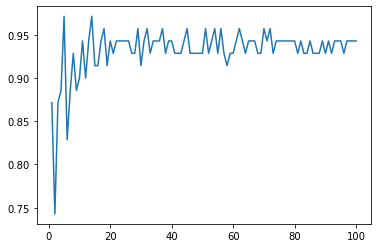

In [299]:
#plot      
x = np.linspace(1, 100, num=100)
y = accuracy  
plt.plot(x,y)
plt.show()


c) Repeat part **b** with LR.

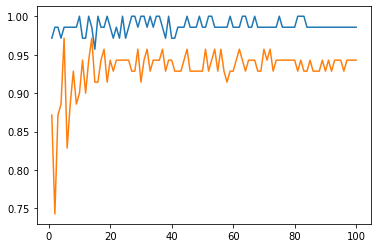

In [300]:
from sklearn.linear_model import LogisticRegression           
percentage = 0.01   
accuracy1 = []
for i in range(100):     
    model = LogisticRegression()
    trainkeys = list(train.keys()) 
    datalength = len(trainkeys)    
    partitionX = []   
    labelY = []  
    amount = int(datalength*percentage)  
    #grab random indexes from trainkeys 
    for j in range(amount):  #amount is number of samples to grab in this current interation  
        temp = int(random.uniform(0,datalength-1))  #pick random index between 0 and datalength-1 
        partitionX.append(list(train[trainkeys[temp]].values())[0:9])   #append that data to partionX
        labelY.append(list(train[trainkeys[temp]].values())[9]) #append the value to labelY 
        trainkeys.pop(temp)  #remove that datapoint from the trainkeys array so we dont accidentally select it again 
        datalength = len(trainkeys)  #update datalength 
    
    partitionX = np.matrix(partitionX)   
  
    model.fit(partitionX, labelY)  
    #testing for AIDS here   
    
    accuracy1.append(accuracy_check(model,labelY,test))  
    percentage += 0.01      
    
x = np.linspace(1, 100, num=100)
y = accuracy1  
y1 = accuracy 
plt.plot(x,y) 
plt.plot(x,y1)
plt.show()


Between a generative model (NB) and a discriminative model (LR), which is more affected by small training dataset? Think about a reason for this.

## Problem 5

What is the hyperparameters, the parameters, and the objective function for finding the best hypothesis for each of the following methods:

1. Decision Tree (Entropy gain)
2. Support Vector Machine
3. K-nearest Neighbors Clustering